In [40]:
class Agent:
    def __init__(self):
        self.actions = ["up","down","left","right"]
        self.pos = (0,0)
        
agent = Agent()

### 湖の追加（ペナルティエリアの追加）

In [82]:
size = 15

class State:
    def __init__(self,actions):
        self.Q = {}
        for a in actions:
            self.Q[a] = 0.0
        self.best_action = "up"
        self.goal = False
        
    def set_goal(self,actions):
        for a in actions:
            self.Q[a] = 0.0
        self.goal = True

    def set_lake(self,actions):
        for a in actions:
            self.Q[a] = 100000.0
        self.goal = False
        
states = [[State(agent.actions) for i in range(size)] for j in range(size)]
for i in range(5):
    for j in range(5):
        states[i+5][j+5].set_lake(agent.actions)
states[13][13].set_goal(agent.actions)

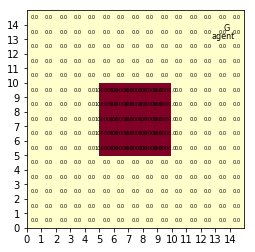

In [91]:
import matplotlib.pyplot as plt  
import matplotlib.patches as patches

def draw(mark_pos):
    fig, ax = plt.subplots()
    values = [[states[i][j].Q[states[i][j].best_action] for j in range(size)] for i in range(size)]
    mp = ax.pcolor(values, cmap=plt.cm.YlOrRd,vmin=0,vmax=8)
    ax.set_aspect(1)
    ax.set_xticks(range(size), minor=False)
    ax.set_yticks(range(size), minor=False)
    
    for x in range(len(values)):
        for y in range(len(values[0])):
            s = states[x][y]
            plt.text(x+0.5,y+0.5,int(1000*s.Q[s.best_action])/1000,ha = 'center', va = 'center', size=5)
            if states[x][y].goal:
                plt.text(x+0.75,y+0.75,"G",ha = 'center', va = 'center', size=8)
                
    plt.text(agent.pos[0]+0.5,agent.pos[1]+0.25,"agent",ha = 'center', va = 'center', size=8)
    
    if mark_pos == "all":   # 指定した位置にactionの文字列を書くという処理
        for x in range(size):
            for y in range(size):
                if states[x][y].goal: continue
                plt.text(x+0.5,y+0.25,states[x][y].best_action,ha = 'center', va = 'center', size=1)
    elif mark_pos != None: 
        s = states[mark_pos[0]][mark_pos[1]]
        plt.text(mark_pos[0]+0.5,mark_pos[1]+0.25,s.best_action,ha = 'center', va = 'center', size=1)
            
    plt.show()
    fig.clear()
    
draw(None)

In [92]:
import random

def state_transition(s_pos,a):
    ###確率10%で元のまま ###
    if random.uniform(0,1) < 0.1:
        return s_pos
    
    x,y = s_pos
    if   a == "up": y += 1
    elif a == "down": y -= 1
    elif a == "right": x += 1
    elif a == "left": x -= 1
        
    if x < 0:       x = 0
    elif x >= size: x = size-1
    if y < 0:       y = 0
    elif y >= size: y = size-1
        
    return (x,y)

In [93]:
def e_greedy(s):
    if random.uniform(0,1) < 0.1: #10%でランダムに
        return random.choice(agent.actions)
    else:
        best_a = None
        best_q = 1000000000
        for a in s.Q:
            if best_q > s.Q[a]:
                best_q = s.Q[a]
                best_a = a
        s.best_action = best_a
        return best_a

### greedy方策の追加

In [94]:
def greedy(s):
    best_a = None
    best_q = 1000000000
    for a in s.Q:
        if best_q > s.Q[a]:
            best_q = s.Q[a]
            best_a = a
    s.best_action = best_a
    return best_a

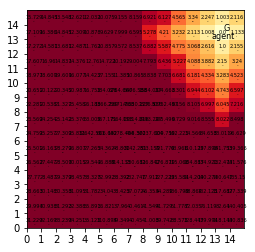

In [95]:
alpha = 0.5
gamma = 1.0

def sarsa(s_pos,a):
    s = states[s_pos[0]][s_pos[1]]
    s_next_pos = state_transition(s_pos,a)
    s_next = states[s_next_pos[0]][s_next_pos[1]]
    a_next = e_greedy(s_next)
    
    q = (1.0-alpha)*s.Q[a] + alpha * (1.0 + gamma * s_next.Q[a_next])
#    print("s:" + str(s_pos)+ "　a:" + a + " s':" + str(s_next_pos) + " a':" + a_next)
#    print("----")
    return s_next_pos, a_next, q

def one_trial():
    agent.pos = (random.randrange(size),random.randrange(size))
    a = e_greedy(states[agent.pos[0]][agent.pos[1]])
    if states[agent.pos[0]][agent.pos[1]].goal:
        return
          
    while True:
        #draw(None)
        s_next, a_next, q = sarsa(agent.pos,a)
        states[agent.pos[0]][agent.pos[1]].Q[a] = q
        agent.pos = s_next
        a = a_next
        if states[agent.pos[0]][agent.pos[1]].goal:
            break
            
            
for i in range(1000):
    one_trial()
draw("all")

### エージェントの動きの描画
sarsaのため大きく湖を避けている様子が見て取れる

(5, 3)
(5, 3) left
(4, 3) down
(4, 2) left
(3, 2) left
(2, 2) up
(2, 3) left
(1, 3) up
(1, 4) left
(0, 4) up
(0, 5) up
(0, 6) up
(0, 7) up
(0, 8) up
(0, 9) up
(0, 10) up
(0, 11) up
(0, 11) up
(0, 12) right
(1, 12) right
(2, 12) right
(3, 12) right
(4, 12) right
(5, 12) right
(6, 12) up
(6, 13) right
(7, 13) right
(8, 13) right
(9, 13) right
(10, 13) right
(11, 13) right
(12, 13) right


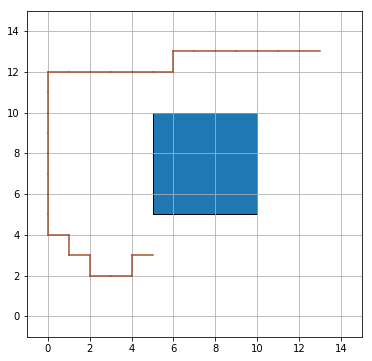

In [154]:
def ugoku():

    # 6×4サイズのFigureを作成
    fig = plt.figure(figsize = (6, 6))
    # FigureにAxesを１つ追加
    ax = fig.add_subplot(111)
    # 目盛線を表示
    ax.grid()
    # x軸の範囲を設定
    ax.set_xlim([-1, 15])
    ax.set_ylim([-1, 15])

    r = patches.Rectangle(xy=(5, 5), width=5, height=5, ec='#000000', fill=True)
    ax.add_patch(r)
    
    agent.pos = (random.randrange(size),random.randrange(size))
    a = greedy(states[agent.pos[0]][agent.pos[1]])
    if states[agent.pos[0]][agent.pos[1]].goal:
        return
    print(agent.pos)
    for i in range(100):
        #draw(None)
        print(agent.pos,a)

        
        s_pos = agent.pos#(0,0)#agent.pos[0],agent.pos[1]
        s_next = state_transition(s_pos,a)
        #s_next = states[s_next_pos[0]][s_next_pos[1]]
        ax.plot([agent.pos[0], s_next[0]], [agent.pos[1], s_next[1]], color = "sienna")        
        agent.pos = s_next
        a = greedy(states[agent.pos[0]][agent.pos[1]])
#        print(agent.pos)

        if states[agent.pos[0]][agent.pos[1]].goal:
            break
ugoku()